# Problem Set 2, due January 28 at 11:59 pm

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours in the past trying to make various versions import for grading.

In [5]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [6]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [7]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


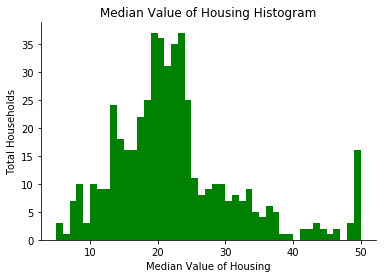

In [8]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

#make MEDV into the target variable
df_data = pd.DataFrame(bdata.data, columns=bdata.feature_names)
all_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', "MEDV"]
df_data['MEDV']=bdata.target

#the bin width is 1 because the data is listed in $1000s
w=1

# edit the code below to make the graph look good
plt.hist(df_data['MEDV'],color = 'green', edgecolor='none',bins=np.arange(min(df_data['MEDV']),max(df_data['MEDV'])+w,w))
plt.xlabel('Median Value of Housing')
plt.ylabel('Total Households')
plt.title('Median Value of Housing Histogram')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


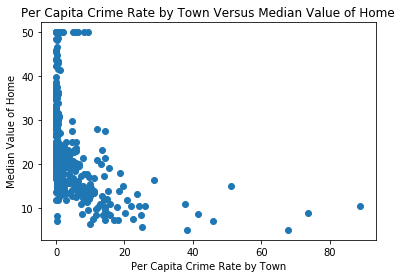

In [9]:
# enter your code below
x=df_data['CRIM']
y=df_data['MEDV']
plt.scatter(x,y)
plt.xlabel('Per Capita Crime Rate by Town')
plt.ylabel('Median Value of Home')
plt.title('Per Capita Crime Rate by Town Versus Median Value of Home')
plt.show()

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

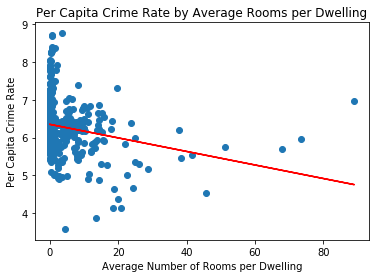

In [10]:
#Here I will plot Median Value of Home versus Number of Rooms in Home
# enter your code here
x=df_data['CRIM']
y=df_data['RM']
plt.scatter(x,y)
m, b =np.polyfit(x,y,1)
plt.plot(x,m*x+b, color='red')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Per Capita Crime Rate')
plt.title('Per Capita Crime Rate by Average Rooms per Dwelling')
plt.show()

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [11]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
import math 
def compute_rmse(predictions, yvalues):
    #your code here
   #np.sqrt(np.mean(np.subtract(predictions,yvalues))**2)
    MSE = np.square(np.subtract(yvalues,predictions)).mean()
    RMSE=math.sqrt(MSE)
    return RMSE

print(compute_rmse((2,2,3),(0,2,6)))
    

2.0816659994661326


###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [13]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# enter your code here
bdata_train = df_data.sample(frac=0.66)
bdata_test = df_data.drop(bdata_train.index)


###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [22]:
# enter your code here
#the second
print(compute_rmse(bdata_train['MEDV'].mean(),bdata_train['MEDV']))
print(compute_rmse(bdata_train['MEDV'].mean(),bdata_test['MEDV']))

8.574434415407312
10.30926225634554


The rmse using the training data was lower than that with the test data. This is because the mean is being compared to new data on the test data so it would make sense that the values would be further off than that of where it's value is based off of the mean of the values. The test values would have a different mean.

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [15]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
    #your code here
    delta_vec = np.abs(np.array(x1) - np.array(x2))
    dist = np.sum(delta_vec**L)**(1/L)
    return dist
print(distance((3,4),(6,8),2))

5.0


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [28]:
"""
Function
--------
nneighbor

Given training and test set for both features and target,as well as the L-Norm distance between them, return RMSE for the predicted
('MEDV') using nearest neighbors with CRIM and RM as the features used

Parameters
----------
x_train,y_train,x_test,y_test: array
    Arrays of both the features and target split into testing and training

L: int
    Value of L to use in computing distances

Returns
-------
rmse : int
   Root mean squared error for predicting MEDV with nearest neighbor

then apply it

"""
import time
def nneighbor(x_train,y_train,x_test,y_test, L):
    start_time = time.time()
    #your code here
    #make a list of empty predictions
    predictions = []
    #for (x in x_test) compute the distances from the training set
    for x1 in x_test:
        distances = []
    for x2 in x_train:
        distances.append(distance(x1,x2,L))
    #add those to the empty predictions
    predictions.append(float(y_train[np.where(distances == min(distances))[0][0]]))
    #outside for loop, get the rmse
    rmse=compute_rmse(predictions,y_test)
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return rmse

#your additional code here
#adjust to include crime and rooms totals as the x columns
x_cols = ["CRIM", "RM"]
y_col = "MEDV"

#adjust train and test data to the new desired fields
features_train=bdata_train[x_cols].values
target_train=bdata_train[y_col].values
features_test=bdata_test[x_cols].values
target_test=bdata_test[y_col].values

nneighbor(features_train,target_train,features_test,target_test,2)

Time taken: 0.01 seconds


17.102871036010846

###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [31]:
"""
Function
--------
normalize

array of values for feature is taken as an input and returns normalized array

Parameters
----------
raw data: array
    feature data
Returns
-------
normalized data: array
the raw data put in from the features data will all be normalized so that it can be used to compare

"""
def normalize(raw_data):
    #your code here
    normalized_data = (raw_data - np.mean(raw_data,axis=0)) / np.std(raw_data, axis=0)
    return normalized_data
features_train_normalized = normalize(features_train)
features_test_normalized = normalize(features_test)
#your additional code here
nneighbor(features_train_normalized,target_train,features_test_normalized,target_test,2)

Time taken: 0.01 seconds


10.972733118645657

Normalization resulted in a decrease in the RMSE which makes sense as we are trying to reduce the impact of the outliers. With a reduction of their impact, we see points that are closer to the average.

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [43]:
#model with 2 features
x_cols = ["TAX", "LSTAT"]
y_col = "MEDV"

#adjust train and test data to the new desired fields
features_train=bdata_train[x_cols].values
target_train=bdata_train[y_col].values
features_test=bdata_test[x_cols].values
target_test=bdata_test[y_col].values

#normalize the features data
features_train_normalized = normalize(features_train)
features_test_normalized = normalize(features_test)

nneighbor(features_train_normalized,target_train,features_test_normalized,target_test,2)

Time taken: 0.0 seconds


11.467017920976666

In [45]:
#model with 2 features different L
x_cols = ["TAX", "LSTAT"]
y_col = "MEDV"

#adjust train and test data to the new desired fields
features_train=bdata_train[x_cols].values
target_train=bdata_train[y_col].values
features_test=bdata_test[x_cols].values
target_test=bdata_test[y_col].values

#normalize the features data
features_train_normalized = normalize(features_train)
features_test_normalized = normalize(features_test)

nneighbor(features_train_normalized,target_train,features_test_normalized,target_test,4)

Time taken: 0.01 seconds


11.467017920976666

In [42]:
# enter your code here
#model with 5 features
x_cols = ["TAX", "LSTAT","CRIM", "RM","AGE"]
y_col = "MEDV"

#adjust train and test data to the new desired fields
features_train=bdata_train[x_cols].values
target_train=bdata_train[y_col].values
features_test=bdata_test[x_cols].values
target_test=bdata_test[y_col].values

#normalize the features data
features_train_normalized = normalize(features_train)
features_test_normalized = normalize(features_test)

nneighbor(features_train_normalized,target_train,features_test_normalized,target_test,2)



Time taken: 0.01 seconds


10.315728000778545

In [46]:
# enter your code here
#model with 5 features
x_cols = ["TAX", "LSTAT","CRIM", "RM","AGE"]
y_col = "MEDV"

#adjust train and test data to the new desired fields
features_train=bdata_train[x_cols].values
target_train=bdata_train[y_col].values
features_test=bdata_test[x_cols].values
target_test=bdata_test[y_col].values

#normalize the features data
features_train_normalized = normalize(features_train)
features_test_normalized = normalize(features_test)

nneighbor(features_train_normalized,target_train,features_test_normalized,target_test,4)



Time taken: 0.0 seconds


10.315728000778545

L appears to have no impact on the time taken or on the nearest neighbor. When we increase the amount of features, the RMSE  decreases as we add more features. This makes sense because we are reducing the variation by considering more variables. However, this would potentially lead to overfitting if we did it too much by including variables that are not reliable.

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [55]:
# enter your code here
x_cols = ["CRIM","RM"]
y_col = "MEDV"

X_full = df_data[x_cols]
y_full = df_data[y_col]
rand_order = list(range(len(df_data)))
np.random.seed(seed=13579)
# np.random.shuffle(rand_order)

#split list into 10 chunks
n_kfold = 10

idx_list_kfold = np.array_split(rand_order, n_kfold)
print(idx_list_kfold)

for idx_train, idx_test in idx_list_kfold.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    print(X_train.shape, X_test.shape)
    
#trying to create a loop to touch on each of the chunked data
#for i in range(n_kfold):
   # train = idx_list_kfold.copy()
   # test= idx_list_kfold[i]
   # del train[i]
    #train = pd.concat(train, sort=False)
   # perform(clf,train.copy(), test.copy())



[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]), array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152]), array([153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 1

AttributeError: 'list' object has no attribute 'split'

###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [64]:
"""
Function
--------
KNN

Parameters
----------
training and test data for feature and target
L: int
    Value of L to use in computing distances
K: int
    Number of K nearest neighbors
Returns
-------
rmse
returns the RMSE of different K totals and the run time given that input
"""
def knn(..., L, K):
    # enter your code here
    
    return rmse

# enter your additional code here



###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [51]:
# enter your code here
# I realize we cannot use sklearn but this is the general idea
df_results = pd.DataFrame({'k':[], 'test_error':[]})

for k in range(1,20):
    knn_i = KNeighborsRegressor(n_neighbors=k)
    results_knn_i = cross_validate(estimator=knn_i, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
    df_results = df_results.append({'k': k, 
                                    'test_error': results_knn_i['test_neg_mean_squared_error'].mean() * -1}, ignore_index=True)

df_results


plt.plot(df_results['k'], df_results['test_error'])

NameError: name 'KNeighborsRegressor' is not defined

*Enter your observations here*